In [65]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('City_Master.csv') 
df2 = pd.read_csv('Customer_and_bank details_p1.csv') 
df3 = pd.read_csv('Customer_campaign_details_p1.csv') 
df4 = pd.read_csv('Customer_Postal_Code_details.csv')
df5 = pd.read_csv('Customer_Response_data_p1.csv') 
df6 = pd.read_csv('Customer_social_economic_data_p1.csv') 
df7 = pd.read_csv('Region_code_master.csv')
df8 = pd.read_csv('State_Master.csv')  


In [52]:
data=pd.merge(df2, df3, on='Customer_id', how='inner')
data=pd.merge(data, df5, on='Customer_id', how='inner')
data=pd.merge(data, df6, on='Customer_id', how='inner')
data=pd.merge(data, df4, left_on='Customer_id', right_on='customer_id', how='inner')
data2=pd.merge(df8, df7, on='Region_Code', how='inner')
data=pd.merge(data, data2, on='State_Code', how='inner')
data=pd.merge(data, df1, on='City_Code', how='inner')
print(data.columns)
data.shape

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code_x', 'State_Code_x', 'City_Code',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'customer_id',
       'Postal Code', 'State_Name', 'Region_Code_y', 'Region_Name',
       'City_Name', 'State_Code_y'],
      dtype='object')


(37084, 32)

In [53]:
data = data.loc[:, ~data.columns.str.endswith('_y')]
print(data.columns)
data.shape

Index(['Customer_id', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'Region_Code_x', 'State_Code_x', 'City_Code',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'customer_id',
       'Postal Code', 'State_Name', 'Region_Name', 'City_Name'],
      dtype='object')


(37084, 30)

In [54]:
data.head()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code_x,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,customer_id,Postal Code,State_Name,Region_Name,City_Name
0,1,56,services,married,high.school,no,no,yes,3,S1,...,1.1,93.994,-36.4,4.857,5191.0,1,42420,Kentucky,South,Henderson
1,2,45,services,married,basic.9y,unknown,no,no,3,S1,...,1.1,93.994,-36.4,4.857,5191.0,2,42420,Kentucky,South,Henderson
2,539,32,admin.,single,university.degree,no,no,no,3,S1,...,1.1,93.994,-36.4,4.857,5191.0,539,42420,Kentucky,South,Henderson
3,540,36,services,married,high.school,no,no,no,3,S1,...,1.1,93.994,-36.4,4.857,5191.0,540,42420,Kentucky,South,Henderson
4,997,31,blue-collar,married,basic.9y,no,no,no,3,S1,...,1.1,93.994,-36.4,4.856,5191.0,997,42420,Kentucky,South,Henderson


In [55]:
data.tail()

,Customer_id,age,job,marital,education,default,housing,loan,Region_Code_x,State_Code_x,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,customer_id,Postal Code,State_Name,Region_Name,City_Name
37079,34349,37,housemaid,divorced,high.school,no,no,no,1,S47,...,-3.4,92.379,-29.8,0.753,5017.5,34349,58103,North Dakota,Central,Fargo
37080,5870,58,unknown,married,basic.4y,no,yes,no,4,S48,...,1.1,93.994,-36.4,4.857,5191.0,5870,82001,Wyoming,West,Cheyenne
37081,15864,43,unemployed,divorced,basic.9y,no,no,no,4,S48,...,1.4,93.918,-42.7,4.962,5228.1,15864,82001,Wyoming,West,Cheyenne
37082,25858,37,admin.,single,high.school,no,no,no,4,S48,...,-1.8,93.075,-47.1,1.410,5099.1,25858,82001,Wyoming,West,Cheyenne
37083,35852,47,admin.,divorced,high.school,no,yes,no,4,S48,...,-1.7,94.055,-39.8,0.711,4991.6,35852,82001,Wyoming,West,Cheyenne


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37084 entries, 0 to 37083
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     37084 non-null  int64  
 1   age             37084 non-null  int64  
 2   job             37084 non-null  object 
 3   marital         37084 non-null  object 
 4   education       37084 non-null  object 
 5   default         37084 non-null  object 
 6   housing         37084 non-null  object 
 7   loan            37084 non-null  object 
 8   Region_Code_x   37084 non-null  object 
 9   State_Code_x    37084 non-null  object 
 10  City_Code       37084 non-null  object 
 11  contact         37084 non-null  object 
 12  month           37084 non-null  object 
 13  day_of_week     37084 non-null  object 
 14  duration        37084 non-null  int64  
 15  campaign        37084 non-null  int64  
 16  pdays           37084 non-null  int64  
 17  previous        37084 non-null 

In [59]:
duplicate_rows_df = data[data.duplicated()]
duplicate_rows_df.shape

(0, 30)

In [61]:
data.count() 

Customer_id       37084
age               37084
job               37084
marital           37084
education         37084
default           37084
housing           37084
loan              37084
Region_Code_x     37084
State_Code_x      37084
City_Code         37084
contact           37084
month             37084
day_of_week       37084
duration          37084
campaign          37084
pdays             37084
previous          37084
poutcome          37084
y                 37084
emp.var.rate      37084
cons.price.idx    37084
cons.conf.idx     37084
euribor3m         37084
nr.employed       37084
customer_id       37084
Postal Code       37084
State_Name        37084
Region_Name       37084
City_Name         37084
dtype: int64

In [62]:
print(data.isnull().sum())

Customer_id       0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
Region_Code_x     0
State_Code_x      0
City_Code         0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
customer_id       0
Postal Code       0
State_Name        0
Region_Name       0
City_Name         0
dtype: int64


In [66]:
data.replace("unknown",np.nan,inplace=True)

In [67]:
data.isnull().sum()

Customer_id          0
age                  0
job                306
marital             72
education         1549
default           7700
housing            882
loan               882
Region_Code_x        0
State_Code_x         0
City_Code            0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
customer_id          0
Postal Code          0
State_Name           0
Region_Name          0
City_Name            0
dtype: int64

In [69]:
month_map = {
      "jan": "01",
      "feb": "02",
      "mar": "03",
      "apr": "04",
      "may": "05",
      "jun": "06",
      "jul": "07",
      "aug": "08",
      "sep": "09",
      "oct": "10",
      "nov": "11",
      "dec": "12"}

# Replace month names in the dfFrame with month numbers
data["month"]=data["month"].replace(month_map)

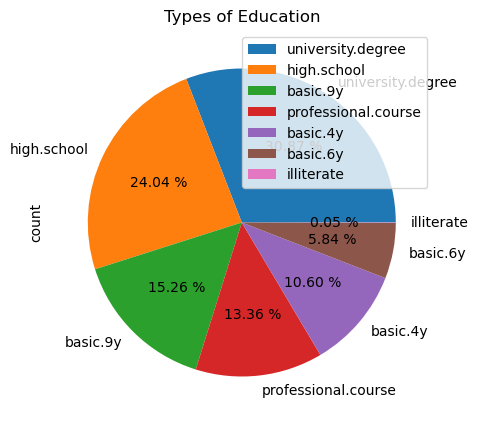

In [92]:
data.copy()
education_counts = data['education'].value_counts()
import matplotlib.pyplot as plt
# Plot a pie chart
education_counts.plot(kind='pie', title='Types of Education',autopct='%.2f %%', figsize=(5,5))

plt.legend()
plt.show()

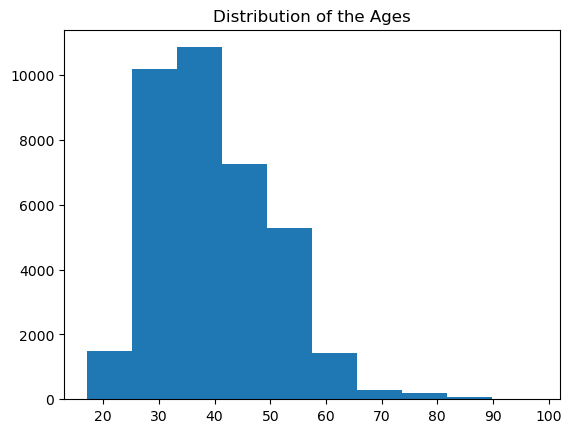

In [74]:
data.copy()
plt.hist(data.age)
plt.title("Distribution of the Ages")
plt.show()

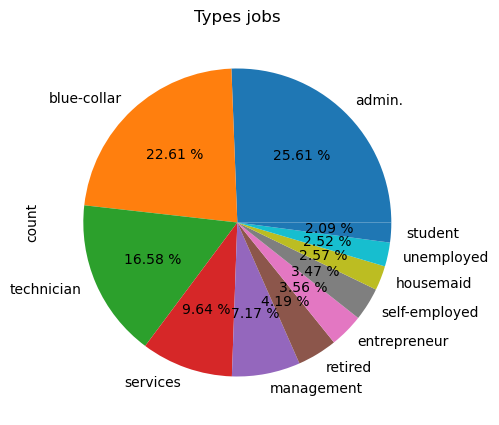

In [91]:
data.copy()
job_counts = data['job'].value_counts()
job_counts.plot(kind='pie', title='Types jobs',autopct='%.2f %%', figsize=(5,5))
plt.show()

<Axes: title={'center': 'What best types of contact '}, xlabel='contact', ylabel='count'>

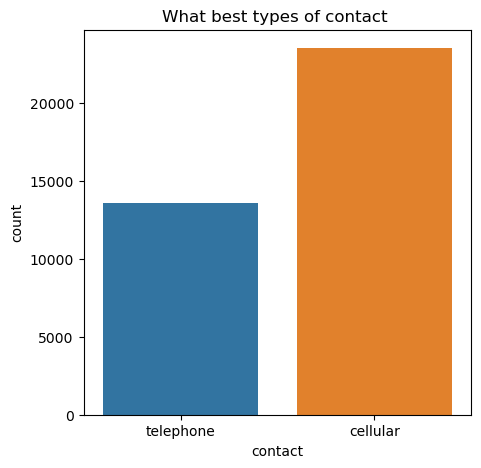

In [90]:
data=data.copy()
import seaborn as sns
fig, ax=plt.subplots(figsize=(5,5)) # size figure
ax.set_title("What best types of contact ")
sns.countplot(x='contact',data=data)

In [78]:
features_with_null=[features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_null:
    print(feature, np.round(data[feature].isnull().mean(), 4),'% missing values')

job 0.0083 % missing values
marital 0.0019 % missing values
education 0.0418 % missing values
default 0.2076 % missing values
housing 0.0238 % missing values
loan 0.0238 % missing values


In [86]:
# customer respone y - yes to 1 and no to 0
target = {"y": {"yes": 1, "no": 0}}
data.replace(target, inplace=True)


4208

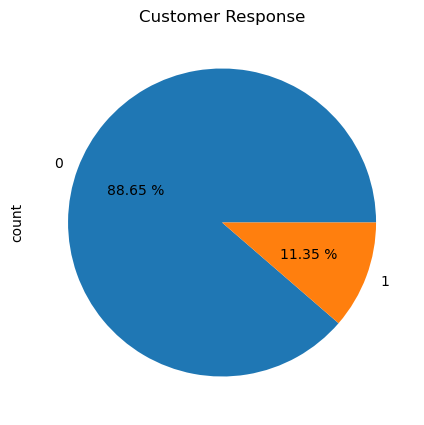

In [89]:
customer_response = data['y'].value_counts()
customer_response.plot(kind='pie', title='Customer Response',autopct='%.2f %%', figsize=(5,5))
plt.show()